In [1]:
#imports

In [2]:
import tensorflow as tf
import cv2,imghdr,os,keras
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pickle,time
import pandas as pd

In [3]:
#gpu oom prevent code block

In [4]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
#reading and organizing data

In [6]:
data_csv = "data/Iris.csv"

In [7]:
data_df = pd.read_csv(data_csv)
data_df = data_df.drop(columns=["Id"])
data_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
X = data_df.iloc[:,0:4].values

In [9]:
y = data_df.iloc[:,4].values

In [10]:
print(X[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
print(y[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [12]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [13]:
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
y = pd.get_dummies(y,dtype=int).values
print(y[:5])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [15]:
#splitting data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.15)

In [17]:
print(x_train[0:5])

[[5.6 3.  4.5 1.5]
 [5.7 4.4 1.5 0.4]
 [5.1 3.8 1.5 0.3]
 [5.5 2.3 4.  1.3]
 [6.7 3.1 5.6 2.4]]


In [18]:
print(y_train[0:5])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]]


In [19]:
print(x_test[0:5])

[[5.5 2.4 3.7 1. ]
 [6.7 3.1 4.4 1.4]
 [6.2 2.2 4.5 1.5]
 [5.7 3.  4.2 1.2]
 [6.5 3.  5.2 2. ]]


In [20]:
print(y_test[0:5])

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]


In [21]:
#creating model

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,BatchNormalization,Flatten,Dropout

In [23]:
x_train.shape

(127, 4)

In [24]:
x_train.shape[0]

127

In [25]:
logdir = "logs"

In [26]:
#optimizing model
#layer_sizes = [32,64,128]
#dense_layers  = [1,2,3]

In [27]:
#after optimizing 128 layer sizes and 1 dense layer seems to be optimal.

In [28]:
layer_sizes = [128]
dense_layers  = [1]

In [29]:
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        NAME = " Layer Size: {}, Dense Layer: {},--{}".format(layer_size,dense_layer,int(time.time()))
        print(NAME)
        
        model = Sequential()
        
        model.add(Dense(layer_size, activation="relu", input_shape=(4,)))
        
        for i in range (dense_layer):
                                
            model.add(Dense(layer_size, activation="relu"))
            
        model.add(Dense(3,activation="softmax"))
            
        tensorboard = tf.keras.callbacks.TensorBoard(log_dir=logdir.format(NAME))
        early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3)
            
        model.summary()
            
        model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
            
        hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test), callbacks=[early_stop])
                

 Layer Size: 128, Dense Layer: 1,--1691443878
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 1s 52ms/step - loss: 1.6598 - accuracy: 0.1339 - val_loss: 1.1930 - val_accuracy: 0.5217
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1579 - accuracy: 0.4173 - val_loss: 1.0711 - val_accurac

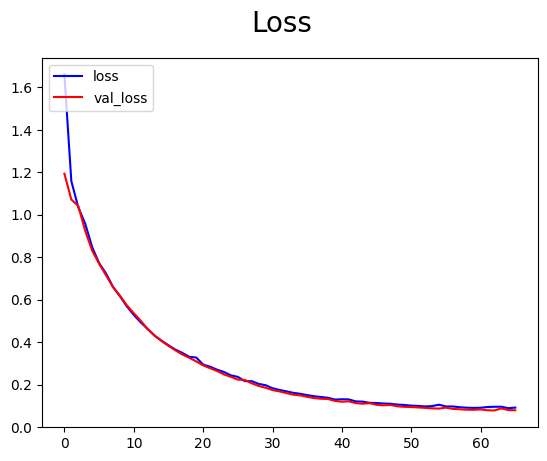

In [30]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="blue", label="loss")
plt.plot(hist.history["val_loss"], color="red", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

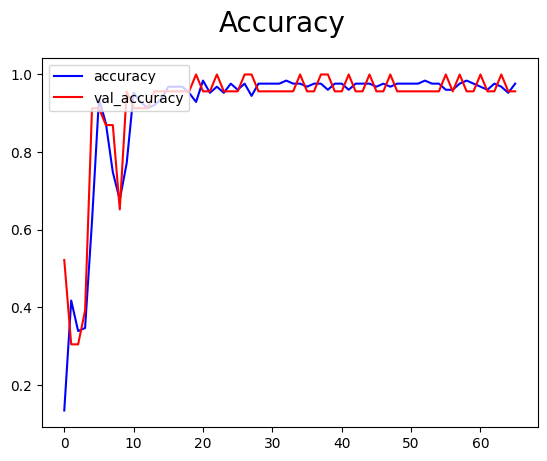

In [31]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="blue", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="red", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [32]:
#testing

In [33]:
_,acc = model.evaluate(x_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

1/1 [==============================] - 0s 20ms/step - loss: 0.0795 - accuracy: 0.9565
Accuracy =  95.652174949646 %
